Pre Requisite 

Name - Sai Shubham  
Roll - 19110132  
PhD

Q1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.  
  
Answer  

Explanation  
(n rows, k columns) multiplied by (k rows and m columns) 
0th row is multiplied by 0th column, so k multiplications, and k-1 additions  
For n rows, n*k multiplications and n*(k-1) additions.  
This completes 0th column of the output matrix. multiplications and additions will be repeated for other columns of second matrix  

For m such columns,  
total multiplications are m*n*k
total additions are m*n*(k-1)  




Q2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Answer  

This is the Python code using lists

In [1]:
import time 
import random


# Matrix A dimension n x k
# Matrix B dimension k x m

#set n,m,k
n = 3
m = 4
k = 5

# matrix A
A = [ [random.randint(1,5) for i in range(k)] for j in range(n)]

# matrix B
B = [ [random.randint(1,10) for i in range(m)] for j in range(k)]

C = [[ 0 for i in range(m)] for j in range(n)]


time_start = time.perf_counter_ns() 
#multiplication 

for i1 in range(n):
    for i2 in range(m):
        sum = 0
        for i3 in range(k):
            sum = sum + A[i1][i3]*B[i3][i2]
            #print(i1,i2,i3)
        C[i1][i2] = sum

time_stop = time.perf_counter_ns()

#output 
print(C)


# print(time_start, time_stop)
#time
time_taken = time_stop - time_start
print(f'time taken in case of lists is {time_taken} ns')

[[32, 62, 54, 69], [56, 92, 42, 131], [70, 94, 61, 113]]
time taken in case of lists is 82500 ns


This is the Python code using numpy

In [9]:
import numpy as np


# Converting list into to NumPy arrays
np_A = np.array(A)
np_B = np.array(B)
np_C = np.ones(shape = (n,m))

start_time = time.perf_counter_ns()
np_C =  np.dot(np_A, np_B)
end_time = time.perf_counter_ns()
time_taken_new = end_time - start_time

print(np_C)
print(f'time taken in case of lists is {time_taken_new} ns')

print( f'The numpy method takes more time as compared to list method by {time_taken_new - time_taken} ns')

[[ 55 119  53  62]
 [ 50  86  41  58]
 [ 56 102  50  69]]
time taken in case of lists is 46500 ns
The numpy method takes more time as compared to list method by -16600 ns


list method is faster than numpy

Q3 
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [17]:
import time

test_array = [4,3,2,1,5,6,7,8]

np_start = time.perf_counter_ns()
#using numpy
np_array = np.array(test_array)
median_np = np.median(np_array)
np_end = time.perf_counter_ns()

#using iterations

n = len(test_array)

test_sample = test_array.copy()
i = 0

list_start = time.perf_counter_ns()

while (i < int(n/2) + 3 ):
    for j in range(n-i-1):
        if test_sample[i] > test_sample[i+1] :
            dummy = test_sample[i+1]
            test_sample[i+1] = test_sample[i]
            test_sample[i]=  dummy
    i = i+1

if n%2 != 0 :
    median_list = test_sample[int(n/2)]
else :
    median_list = ( test_sample[int(n/2)] + test_sample[int(n/2)-1] )/2

list_end = time.perf_counter_ns()

time_taken_np_median = np_end - np_start
time_taken_list_median = list_end - list_start

print(f'median from list method - {median_list}')
print(f'median from numpy method - {median_np}')
print(f' time difference is {time_taken_np_median - time_taken_list_median}')
print(f' numpy method is slower')

median from list method - 4.5
median from numpy method - 4.5
 time difference is 76100
 numpy method is slower


Q4  
What is the gradient of the following function with respect to x and y?

$ x^3 \cdot y + y^3 sin(x) $  

Answer is
with respect to x, it is  
$ 3x^2 \cdot y + y^3 cos(x) $  

with respect to y, it is  
$ x^3 + 3y^2 sin(x) $

Q5  
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [24]:
import jax.numpy as jnp
from jax import grad

# Define the function
def f(x, y):
    return x**3 * y + y**3 * jnp.sin(x)

# Compute the gradient using JAX
gradient_f = grad(f, argnums=(0, 1))

test_cases = [
    (1.0, 2.0),
    (3.0, 4.0),
    (5.0, 6.0),
    (-7.0, 8.0),
    (-9.0,-0.9)
]

# Compare the gradients
for x_value, y_value in test_cases:
    jax_grad = gradient_f(float(x_value), float(y_value))
    
    grad_x = 3 * x_value**2 * y_value + y_value**3 * jnp.cos(x_value)
    grad_y = x_value**3 + 3 * y_value**2 * jnp.sin(x_value)

    print(f"Testing at x={x_value}, y={y_value}")
    print(f"JAX gradient: {jax_grad}")
    print(f"Analytical gradient: (dx: {grad_x}, dy: {grad_y})")    
    print(f"Difference: (dx: {jax_grad[0] - grad_x}, dy: {jax_grad[1] - grad_y})")





Testing at x=1.0, y=2.0
JAX gradient: (Array(10.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
Analytical gradient: (dx: 10.322418212890625, dy: 11.097651481628418)
Difference: (dx: 0.0, dy: 0.0)
Testing at x=3.0, y=4.0
JAX gradient: (Array(44.64048, dtype=float32, weak_type=True), Array(33.773758, dtype=float32, weak_type=True))
Analytical gradient: (dx: 44.640480041503906, dy: 33.77375793457031)
Difference: (dx: 0.0, dy: 0.0)
Testing at x=5.0, y=6.0
JAX gradient: (Array(511.27103, dtype=float32, weak_type=True), Array(21.436172, dtype=float32, weak_type=True))
Analytical gradient: (dx: 511.2710266113281, dy: 21.436172485351562)
Difference: (dx: 0.0, dy: 0.0)
Testing at x=-7.0, y=8.0
JAX gradient: (Array(1561.9979, dtype=float32, weak_type=True), Array(-469.14142, dtype=float32, weak_type=True))
Analytical gradient: (dx: 1561.9979248046875, dy: -469.14141845703125)
Difference: (dx: 0.0, dy: 0.0)
Testing at x=-9.0, y=-0.9
JAX gradient: (Array(

Q6 Use sympy to confirm that you obtain the same gradient analytically.


In [5]:
import sympy as sp

x, y = sp.symbols('x y')

# function
f = x**3 * y + y**3 * sp.sin(x)

# partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


# Test with a few random values of x and y
test_cases = [
    (1, 2),
    (3, 4),
    (5, 6),
    (-7, 8),
    (-9,-0.9)
]

# Compare the gradients
for x_value, y_value in test_cases:
    sympy_grad_x = df_dx.subs({x: x_value, y: y_value})
    sympy_grad_y = df_dy.subs({x: x_value, y: y_value})
    
    # We know from the solutions at Q4
    grad_x = 3 * x_value**2 * y_value + y_value**3 * sp.cos(x_value)
    grad_y = x_value**3 + 3 * y_value**2 * sp.sin(x_value)

    print(f"for x={x_value}, y={y_value}")
    print(f"SymPy gradient: (dx: {sympy_grad_x}, dy: {sympy_grad_y})")
    print(f"Analytical gradient: (dx: {grad_x}, dy: {grad_y})")
    print(f"Difference: (dx: {sympy_grad_x - grad_x}, dy: {sympy_grad_y - grad_y})")



for x=1, y=2
SymPy gradient: (dx: 8*cos(1) + 6, dy: 1 + 12*sin(1))
Analytical gradient: (dx: 8*cos(1) + 6, dy: 1 + 12*sin(1))
Difference: (dx: 0, dy: 0)
for x=3, y=4
SymPy gradient: (dx: 64*cos(3) + 108, dy: 48*sin(3) + 27)
Analytical gradient: (dx: 64*cos(3) + 108, dy: 48*sin(3) + 27)
Difference: (dx: 0, dy: 0)
for x=5, y=6
SymPy gradient: (dx: 216*cos(5) + 450, dy: 108*sin(5) + 125)
Analytical gradient: (dx: 216*cos(5) + 450, dy: 108*sin(5) + 125)
Difference: (dx: 0, dy: 0)
for x=-7, y=8
SymPy gradient: (dx: 512*cos(7) + 1176, dy: -343 - 192*sin(7))
Analytical gradient: (dx: 512*cos(7) + 1176, dy: -343 - 192*sin(7))
Difference: (dx: 0, dy: 0)
for x=-9, y=-0.9
SymPy gradient: (dx: -218.7 - 0.729*cos(9), dy: -729 - 2.43*sin(9))
Analytical gradient: (dx: -218.7 - 0.729*cos(9), dy: -729 - 2.43*sin(9))
Difference: (dx: 0, dy: 0)


Q7  
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [42]:
students_record = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "Albert",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            },
            2:  {
                "Name": "Einstein",
                "Marks": {
                    "Maths": 40,
                    "English": 30
                }
            }
        },
        "Branch 2": {
            1:  {
                "Name": "Blaise",
                "Marks": {
                    "Maths": 99,
                    "English": 20
                }
            },
            2:  {
                "Name": "Pascal",
                "Marks": {
                    "Maths": 30,
                    "English": 100
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Name": "Vikram Sarabhai",
                "Marks": {
                    "Maths": 100,
                    "English": 100
                }
            },
            2:  {
                "Name": "Sardar Patel",
                "Marks": {
                    "Maths": 99,
                    "English": 99
                }
            }
        },
        "Branch 2": {
            1:  {
                "Name": "Homi Bhabha",
                "Marks": {
                    "Maths": 50,
                    "English": 100
                }
            },
            2:  {
                "Name": "Abdul Kalam",
                "Marks": {
                    "Maths": 99,
                    "English": 99
                }
            }
        }
    }
}

print(students_record)

{2022: {'Branch 1': {1: {'Name': 'Albert', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'Einstein', 'Marks': {'Maths': 40, 'English': 30}}}, 'Branch 2': {1: {'Name': 'Blaise', 'Marks': {'Maths': 99, 'English': 20}}, 2: {'Name': 'Pascal', 'Marks': {'Maths': 30, 'English': 100}}}}, 2023: {'Branch 1': {1: {'Name': 'Vikram Sarabhai', 'Marks': {'Maths': 100, 'English': 100}}, 2: {'Name': 'Sardar Patel', 'Marks': {'Maths': 99, 'English': 99}}}, 'Branch 2': {1: {'Name': 'Homi Bhabha', 'Marks': {'Maths': 50, 'English': 100}}, 2: {'Name': 'Abdul Kalam', 'Marks': {'Maths': 99, 'English': 99}}}}}


Q9  
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $ y = x $
2. $ y = x^2 $
3. $ y = \frac{x^3}{100}$
4. $ y = sin(x) $
5. $ y = \frac{sin(x)}{x} $
6. $ y = log(x) $
7. $ y = e^x $ 


Plotting

1. $ y = x $

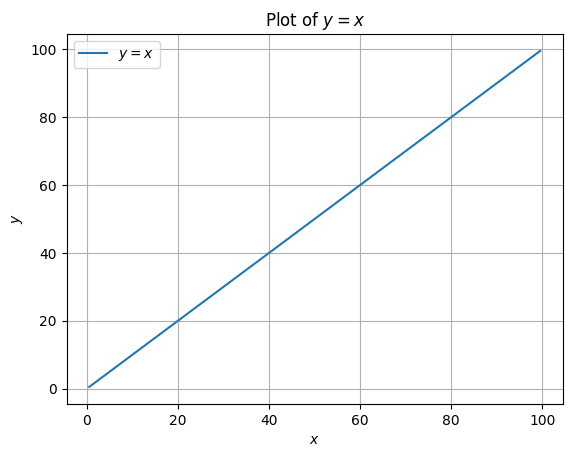

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = x 

plt.plot(x, y, label='$y = x$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plot of $y = x$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


$ y = x^2 $

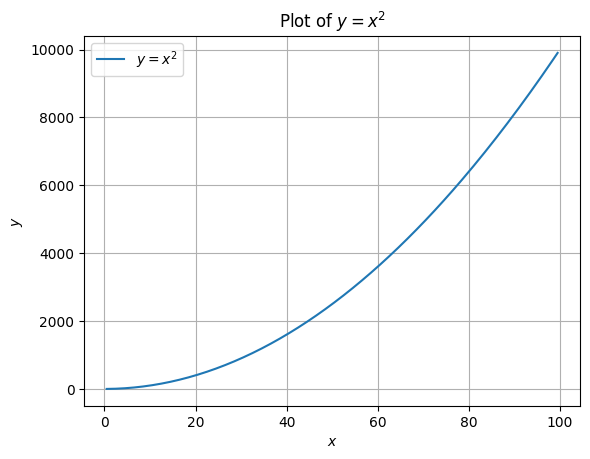

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = x**2 

plt.plot(x, y, label='$ y = x^2 $')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plot of $ y = x^2 $')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


$ y = \frac{x^3}{100}$

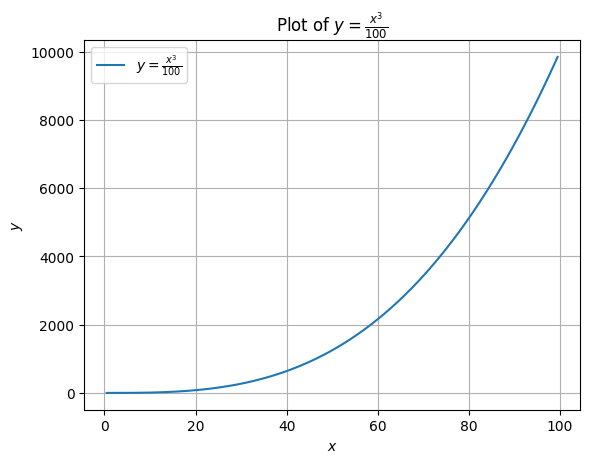

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = (x**3)/100

plt.plot(x, y, label=r'$y = \frac{x^3}{100}$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'Plot of $y = \frac{x^3}{100}$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


$ y = sin(x) $

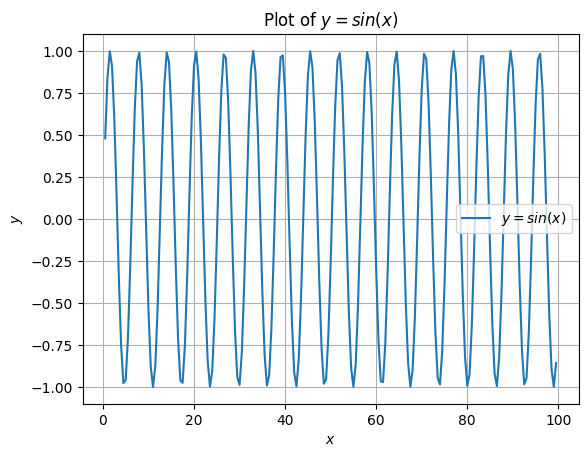

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = np.sin(x)

plt.plot(x, y, label=r'$ y = sin(x) $')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'Plot of $ y = sin(x) $')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


$ y = \frac{sin(x)}{x} $

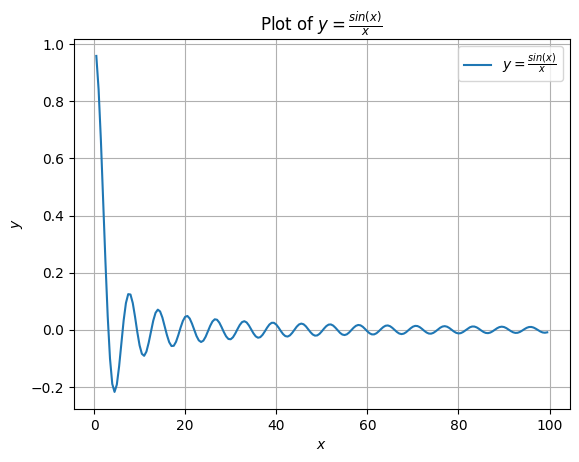

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = np.sin(x)/x

plt.plot(x, y, label=r'$ y = \frac{sin(x)}{x} $')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'Plot of $ y = \frac{sin(x)}{x} $')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


$ y = log(x) $

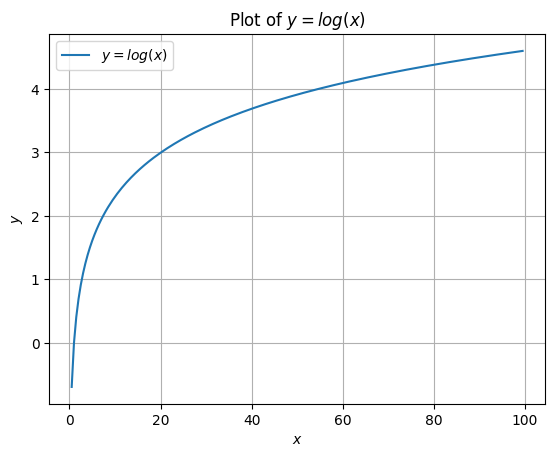

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = np.log(x)

plt.plot(x, y, label=r'$ y = log(x) $')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'Plot of $ y = log(x) $')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
e

$ y =  e^x $

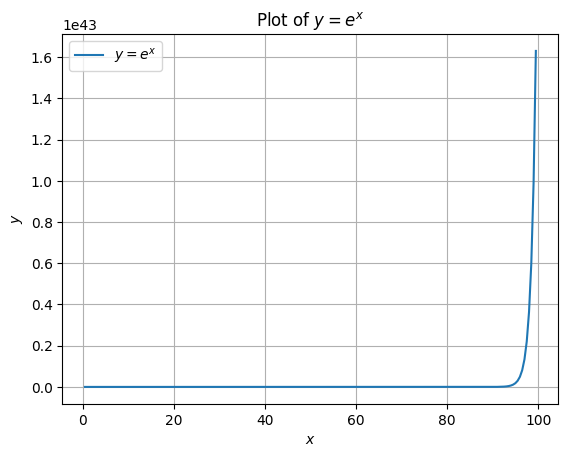

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0.5, 100, 0.5)
y = np.e**x

plt.plot(x, y, label=r'$ y =  e^x $')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'Plot of $ y =  e^x $')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Q10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [27]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

std_dev = df.std()
max_std_column = np.argmax(std_dev)

df2 = df.T
row_means = df2.mean()
row_lowest_mean = np.argmin(row_means)
# row_lowest_mean
# Display the results
print("DataFrame:\n", df)
print(f"Column with the highest standard deviation: {max_std_column}")
print(f"Row with the lowest mean: {row_lowest_mean}")


DataFrame:
            a         b         c         d         e
0   1.565222  1.899571  1.506712  1.041166  1.341912
1   1.214385  1.188362  1.686607  1.469138  1.008355
2   1.553384  1.199593  1.097696  1.444842  1.238714
3   1.740713  1.709925  1.889327  1.171628  1.961069
4   1.957296  1.129992  1.154320  1.773337  1.189041
5   1.973770  1.867902  1.735122  1.454875  1.460921
6   1.825953  1.232418  1.633498  1.312151  1.427964
7   1.578401  1.775603  1.212781  1.787863  1.985699
8   1.640643  1.147831  1.316592  1.274877  1.394561
9   1.919540  1.139064  1.655677  1.575799  1.304278
10  1.008639  1.036720  1.393945  1.359151  1.242471
11  1.694950  1.798494  1.694284  1.172909  1.621226
12  1.055790  1.780760  1.479722  1.764521  1.760705
13  1.271795  1.682586  1.140233  1.696069  1.879888
14  1.258282  1.177386  1.138729  1.461046  1.085188
15  1.409726  1.723598  1.196100  1.336731  1.783877
16  1.329342  1.956151  1.179616  1.584524  1.784992
17  1.053746  1.730195  1.502256  

Q11  
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [29]:
# Add column f which is the sum of a,b,c,d,e
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

# Add column g which is 'LT8' if 'f' < 8 and 'GT8' otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where 'g' is 'LT8'
num_lt8 = df[df['g'] == 'LT8'].shape[0]

# Calculate the standard deviation 
std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

# Display the results
print(f"Number of rows where 'g' is 'LT8': {num_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_f_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_f_gt8}")

Number of rows where 'g' is 'LT8': 16
Standard deviation of 'f' where 'g' is 'LT8': 0.6106098811031425
Standard deviation of 'f' where 'g' is 'GT8': 0.20584906358820146


Q12 
Write a small piece of code to explain broadcasting in numpy.

In [32]:
import numpy as np


# suppose there is a non-uniform matrix

matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8], 
                   [9,10,11,12]])

# Create a 1D array (vector)
vector = np.array([99,98,97,96])


broadcast = matrix + vector

print("Matrix:")
print(matrix)

print("\nVector:")
print(vector)

print("\nResult of broadcasting addition:")
print(broadcast)

Matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Vector:
[99 98 97 96]

Result of broadcasting addition:
[[100 100 100 100]
 [104 104 104 104]
 [108 108 108 108]]


Q13  
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [20]:
def argumin(test_array):
    min_value = test_array[0]
    index_value = 0
    for i in range(1, test_array.size):
        if test_array[i] < min_value :
            min_value = test_array[i]
            index_value = i 
        else :
            pass 
    
    return index_value

#input array
test_array = np.array([5,8,9,20,10,17,18,21,7])
index_value = argumin(test_array)

# compare with numpy

index_numpy = np.argmin(test_array)

print(f'from my method, the index value is {index_value} for minimum array element')
print(f'using numpy the index value is {index_numpy}')

from my method, the index value is 0 for minimum array element
using numpy the index value is 0
